# Exercise 4
---
id1 = "315022103'
id2 = "316390053"

name_student_1 = "Orel, buchris"
name_student_2 = "Bar, gavriely "


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

question 1:

In [2]:
url = 'https://raw.githubusercontent.com/ShaiYona/Data-Science2021B/main/Assignments/4/nba.csv'
nba_df = pd.read_csv(url)
nba_df1=nba_df.dropna().copy()
nba_df1=nba_df1.reset_index(drop=True)
nba_df1[['Weight','Height','Age','Salary']].head(3)

,Weight,Height,Age,Salary
0,180.0,6-2,25.0,7730337.0
1,235.0,6-6,25.0,6796117.0
2,185.0,6-5,22.0,1148640.0


question 2:

In [3]:
nba_df1["Height"]=nba_df1["Height"].apply(lambda x: int(x.split('-')[0])*30.48 + int(x.split('-')[1])*2.54)
nba_df1[['Age','Weight','Height','Salary']].head(3)

,Age,Weight,Height,Salary
0,25.0,180.0,187.96,7730337.0
1,25.0,235.0,198.12,6796117.0
2,22.0,185.0,195.58,1148640.0


question 3:

<AxesSubplot:xlabel='Position', ylabel='count'>

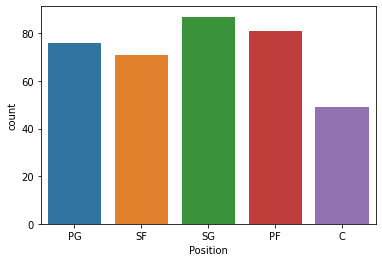

In [4]:
sns.countplot(x="Position", data=nba_df1)

<AxesSubplot:ylabel='Position'>

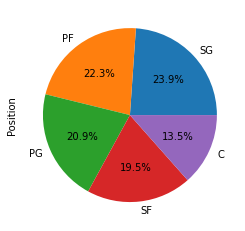

In [5]:
nba_df1['Position'].value_counts().plot.pie(autopct='%1.1f%%')

In my opinion the better plot to look at is the countplot because the visualization is clearer in a sense that its easy to see exactly how  the collums are ranked from largest to smallest

question 4:

In [6]:
model1 = sk.tree.DecisionTreeClassifier(criterion="gini")
features = ['Age','Weight','Height']
X = nba_df1[features]
y = nba_df1['Salary']
model1.fit(X, y)
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size=0.3, random_state=1) 
X_train.head()


,Age,Weight,Height
23,28.0,205.0,190.50
132,31.0,232.0,210.82
222,25.0,230.0,195.58
111,25.0,240.0,200.66
51,26.0,220.0,200.66


In [11]:
y_test.head()

250     1499187.0
208     2489530.0
95       981348.0
138    16407501.0
229      169883.0
Name: Salary, dtype: float64

question 5: we chose decision tree because it has high accuracy and does not require previous nba knowledge which we do not have.

In [13]:
model2 = sk.tree.DecisionTreeClassifier(criterion="gini")
model2.fit(X_train,y_train)

DecisionTreeClassifier()

question 6:

In [16]:
prediction2 = model2.predict(X_test)
prediction2 
df = pd.DataFrame(columns = ['Salary', 'predictions'])
df['Salary'] = y_test
df = df.reset_index(drop=True)
df['predictions'] = pd.Series(prediction2)
sk.metrics.accuracy_score(prediction2, y_test)

0.01818181818181818

question 7: The model seems to be better since we added the position collum it seemed likley due to the nature of the fact that in sports it is likley that salary and position have a high correlation it showed in the result.

question 8: we used max depth of 1 to show acc for the model.

In [41]:
model = sk.tree.DecisionTreeClassifier(criterion="gini", max_depth=1, random_state=0)
model.fit(X_train, y_train)
preds_val = model.predict(X_test)
acc = sk.metrics.accuracy_score(preds_val, y_test)
print(acc)

0.13636363636363635


In [ ]:
#we chose to use gini over mse because after observering the data we found that the problem was with the models themselfs and not the the criteria because the values seemed really off